In [1]:
#18/05/21: stripped down version of IBM code for running locally on IBM Qsystem 1
import math
import certifi
# Importing standard Qiskit libraries and configuring account
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy import stats

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer,BasicAer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import circuit_drawer



SQL= 0.015625
quant adv= 0.025390625
3 copy quant adv= 0.037248
mse =  0.05051129703986824
mse og =  0.06472549311802131


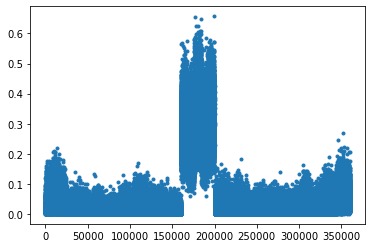

In [2]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
ii=complex(0,1)
#number of total repitions; 
nrep=45
#number of repitions for the training 
nrand=30
#number of times we make a measurement before recalibrating
nper=5
nrepT=round(nrep/nper)
#rotation angle
th=0
#decoherence
p=0.5
#no of shots 
shots=8192
shotseff=shots/3
grouping=8
shotseff2=shotseff/grouping
#results
mse2q1=[]
mse2qMIT1=[]
mse2qMIT_alt1=[]
alt_mse2qMIT1=[]
alt_mse2qMIT_alt1=[]

#estimator coefficients

cname='rigetti'
predx=[]
predy=[]
predxMIT=[]
predyMIT=[]


gradXA=[]
gradYA=[]
intXA=[]
intYA=[]

n1T=[]
n2T=[]
n3T=[]
n4T=[]
n5T=[]
n6T=[]
n7T=[]
n8T=[]

chiX1 = -0.1338;
chiX2 = 0.1338;
chiX3 = -2.4681;
chiX4 = 0.7817;
chiX5 =-0.7817;
chiX6 = 0.7156;
chiX7 =  -0.7156;
chiX8 = 2.4681;


chiY1 = -2.4680;
chiY2 =  2.4680;
chiY3 =0.1338;
chiY4 = 0.7157
chiY5 =-0.7157;
chiY6 = -0.7819;
chiY7 =  0.7819;
chiY8 = -0.1338;

msealt=[]
msealt2=[]

count=0

caldata_x=[]
caldata_y=[]

n1cal=[]
n2cal=[]
n3cal=[]
n4cal=[]
n5cal=[]
n6cal=[]
n7cal=[]
n8cal=[]
for totcount in range(nrepT):
    if totcount !=14:
        thvec=np.linspace(-0.2,0.2,nrand)

        #loading real counts
        F = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("training_data")+str(".npz")))
        a=F['arr_0']
        n1=np.transpose(a)[0]
        n2=np.transpose(a)[1]
        n3=np.transpose(a)[2]
        n4=np.transpose(a)[3]
        n5=np.transpose(a)[4]
        n6=np.transpose(a)[5]
        n7=np.transpose(a)[6]
        n8=np.transpose(a)[7]




        noisy2QX=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/2731)
        noisy2QY=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/2731)
        n1cal.append(n1)
        n2cal.append(n2)
        n3cal.append(n3)
        n4cal.append(n4)
        n5cal.append(n5)
        n6cal.append(n6)
        n7cal.append(n7)
        n8cal.append(n8)
        #generating data to fit to
        clean2QX=[]
        True2QX=[]
        clean2QY=[]
        True2QY=[]
        thvec=np.linspace(-0.2,0.2,nrand)
        for jj in range(nrand):
            thint=thvec[jj]

            True2QX.append(thint)
            True2QY.append(thint)

        #regression
        res2QX_alt = stats.linregress(np.array(noisy2QX),np.array(True2QX))

        res2QY_alt = stats.linregress(np.array(noisy2QY),np.array(True2QX))

    #     plt.figure(totcount+1)
    #     plt.plot(True2QX,noisy2QX,'.')
    #     plt.plot(True2QX,noisy2QY,'o')

    #     plt.plot(True2QX,True2QX)

        caldata_x.append(noisy2QX)
        caldata_y.append(noisy2QY)

        gradXA.append(res2QX_alt.slope)
        gradYA.append(res2QY_alt.slope)

        intXA.append(res2QX_alt.intercept)
        intYA.append(res2QY_alt.intercept)

        #measurement results
        F000res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n000vec")+str(".npz")))
        a000res=F000res['arr_0']
        F001res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n001vec")+str(".npz")))
        a001res=F001res['arr_0']
        F010res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n010vec")+str(".npz")))
        a010res=F010res['arr_0']
        F011res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n011vec")+str(".npz")))
        a011res=F011res['arr_0']

        F100res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n100vec")+str(".npz")))
        a100res=F100res['arr_0']
        F101res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n101vec")+str(".npz")))
        a101res=F101res['arr_0']
        F110res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n110vec")+str(".npz")))
        a110res=F110res['arr_0']
        F111res = np.load(str(cname+str("_LR")+str("/")+str('run')+str(totcount)+str("_3Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n111vec")+str(".npz")))
        a111res=F111res['arr_0']

        n1=np.transpose(a000res)
        n2=np.transpose(a001res)
        n3=np.transpose(a010res)
        n4=np.transpose(a011res)
        n5=np.transpose(a100res)
        n6=np.transpose(a101res)
        n7=np.transpose(a110res)
        n8=np.transpose(a111res)

        for new_count in range(nper):
            n1T.append(n1[new_count])
            n2T.append(n2[new_count])
            n3T.append(n3[new_count])
            n4T.append(n4[new_count])
            n5T.append(n5[new_count])
            n6T.append(n6[new_count])
            n7T.append(n7[new_count])
            n8T.append(n8[new_count])
    #         count=count+1
    #         print(n1[new_count]+n2[new_count]+n3[new_count]+n4[new_count]+n5[new_count]+n6[new_count]+n7[new_count]+n8[new_count])



        estX=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/2731)
        estY=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/2731)

        #mitigated results X
        estxMIT_Aalt=res2QX_alt.intercept + estX

        #mitigated results Y
        estyMIT_Aalt=res2QY_alt.intercept + estY

        mse2q1.append((estX-th)**2+(estY-th)**2)
        alt_mse2qMIT_alt1.append((estxMIT_Aalt-th)**2+(estyMIT_Aalt-th)**2)

        for jjj in range(nper):
            for outside in range(1000):

                data1=np.ones(int(shotseff))
                data1[:int(n1[jjj])] = 0
                data1[int(n1[jjj]):int(n1[jjj])+int(n2[jjj])] = 2
                data1[int(n2[jjj])+int(n1[jjj]):int(n3[jjj])+int(n2[jjj])+int(n1[jjj])] = 3
                data1[int(n3[jjj])+int(n2[jjj])+int(n1[jjj]):int(n3[jjj])+int(n2[jjj])+int(n1[jjj])+int(n4[jjj])] = 4

                data1[int(n3[jjj])+int(n2[jjj])+int(n1[jjj])+int(n4[jjj]):int(n3[jjj])+int(n2[jjj])+int(n1[jjj])+int(n4[jjj])+int(n5[jjj])] = 5
                data1[int(n3[jjj])+int(n2[jjj])+int(n1[jjj])+int(n4[jjj])+int(n5[jjj]):int(n3[jjj])+int(n2[jjj])+int(n1[jjj])+int(n4[jjj])+int(n5[jjj])+int(n6[jjj])] = 6
                data1[int(n3[jjj])+int(n2[jjj])+int(n1[jjj])+int(n4[jjj])+int(n5[jjj])+int(n6[jjj]):int(n3[jjj])+int(n2[jjj])+int(n1[jjj])+int(n4[jjj])+int(n5[jjj])+int(n6[jjj])+int(n7[jjj])] = 7
                np.random.shuffle(data1)


                for groupcount in range(grouping):
                    dataint=data1[int(groupcount*shotseff2):int((groupcount+1)*shotseff2)]

                    n1te=np.count_nonzero(dataint==0)
                    n2te=np.count_nonzero(dataint==2)
                    n3te=np.count_nonzero(dataint==3)
                    n4te=np.count_nonzero(dataint==4)
                    n5te=np.count_nonzero(dataint==5)
                    n6te=np.count_nonzero(dataint==6)
                    n7te=np.count_nonzero(dataint==7)
                    n8te=np.count_nonzero(dataint==1)

                    thx=(chiX1*n1te+chiX2*n2te+chiX3*n3te+chiX4*n4te+chiX5*n5te+chiX6*n6te+chiX7*n7te+chiX8*n8te)*(1/shotseff2)
                    thy=(chiY1*n1te+chiY2*n2te+chiY3*n3te+chiY4*n4te+chiY5*n5te+chiY6*n6te+chiY7*n7te+chiY8*n8te)*(1/shotseff2)
                    thx2=res2QX_alt.intercept+thx
                    thy2=res2QY_alt.intercept+thy

                    msealt.append((thx2-th)**2+(thy2-th)**2)
                    msealt2.append((thx-th)**2+(thy-th)**2)



expvar=4/(((1-p)**2)*shots);
expvar2Q=2*(2-p+0.5*p**2)/(((1-p)**2)*shots);
expvar3Q=0.001552

# print("MSE=",np.mean(mse2q1))
# print("mitigated MSE=",np.mean(mse2qMIT1))
# print("alt mitigated MSE=",np.mean(mse2qMIT_alt1))
# print("SQL=",expvar)
# print("quant adv=",expvar2Q)
# print("3 copy quant adv=",expvar3Q)

# print("mitigated MSE without slope=",np.mean(alt_mse2qMIT1))
# print("mitigated MSE without slope=",np.mean(alt_mse2qMIT_alt1))


print()
expvar2=4/(((1-p)**2)*(shotseff2*3));
expvar2Q2=4*(2-p+0.5*p**2)/(((1-p)**2)*(shotseff2*3));
expvar3Q2=0.001552*(shots/shotseff2)
print("SQL=",expvar2)
print("quant adv=",expvar2Q2)
print("3 copy quant adv=",expvar3Q2)
print('mse = ',np.mean(msealt))
print('mse og = ',np.mean(msealt2))

plt.plot(msealt,'.')
# print(np.mean(caldata_x,axis=0))
# print(np.mean(caldata_y,axis=0))


6.626284292765695
0.038328506091729074
347269 360000


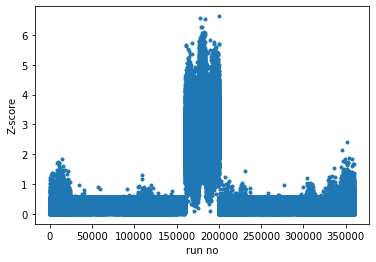

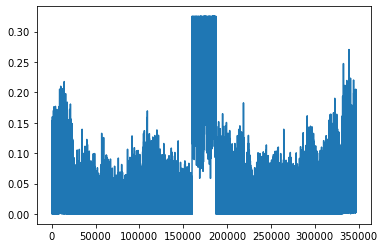

In [3]:
#removing outliers
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(msealt))
print(np.max(z))

plt.plot(z,'.')
plt.ylabel('Z-score')
plt.xlabel('run no')
outlier=np.where(z>3)

mse_upd = np.array(msealt)[(z < 3)]
print(np.mean(mse_upd))

plt.figure(2)
plt.plot(mse_upd)


print(len(mse_upd),len(msealt))

In [4]:
#what fraction of the data is thrown away? :  need this for error bars
frac=len(mse_upd)/len(msealt)
print(frac)

0.9646361111111111


In [13]:
print('Final MSE 3-copy after removing outliers =',print(np.mean(mse_upd)))

0.038328506091729074
Final MSE 3-copy after removing outliers = None


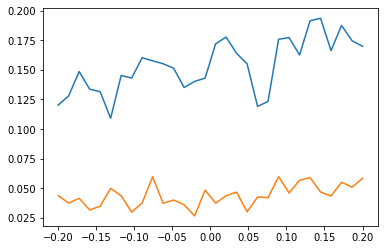

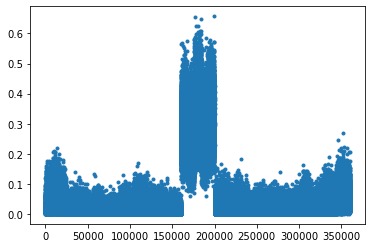

In [5]:
plt.plot(True2QX,np.mean(caldata_x,axis=0))
plt.plot(True2QX,np.mean(caldata_y,axis=0))

plt.figure(2)
plt.plot(msealt,'.')

In [6]:
# print(n1cal[0])
# print(n1tot)
# print(n1cal[0]+n2cal[0]+n3cal[0]+n4cal[0]+n5cal[0]+n6cal[0]+n7cal[0]+n8cal[0])

print(2731*nrepT)

24579


[0.008857440681212513, 0.008502300765808823, 0.008659970290332782, 0.008633675939558617, 0.008969644073864405, 0.00882786901135754, 0.008879426886197098, 0.008805304696608446, 0.008583897239695678, 0.008890986302951431, 0.008422036990523676, 0.008519831513044234, 0.008795281196596838, 0.008507321431733056, 0.008715572223109772, 0.008923052140696242, 0.009024933731528146, 0.008747008013477858, 0.008465024752586947, 0.008538259558429389, 0.008801062449381173, 0.00838449551150026, 0.008819119852154686, 0.008714092625900016, 0.008758604683285105, 0.00872634553289372, 0.00874246860089977, 0.009048014907172055, 0.008886274960933992, 0.008889678115261715]
[0.007637807701270438, 0.007937860795601645, 0.008010813642496556, 0.008244555390262958, 0.007910794798706761, 0.0080102437580989, 0.007846982505341544, 0.007784858418806885, 0.007779180330822007, 0.007893855822035247, 0.00773832197024236, 0.0078111745453883115, 0.008034352325672078, 0.007787907831644367, 0.007755057305563299, 0.007942275472

<ErrorbarContainer object of 3 artists>

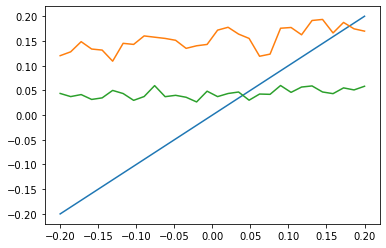

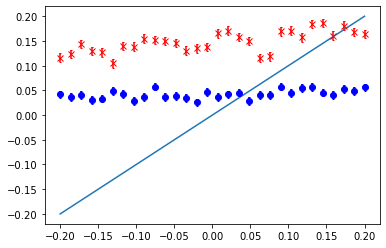

In [7]:
#errors bars on calibration data theta points
#first join all counts together
n1tot=[]
n2tot=[]
n3tot=[]
n4tot=[]
n5tot=[]
n6tot=[]
n7tot=[]
n8tot=[]
for kk in range(nrand):
    n1=0
    n2=0
    n3=0
    n4=0
    n5=0
    n6=0
    n7=0
    n8=0
    for hh in range(nrepT):
        n1=n1+n1cal[hh][kk]
        n2=n2+n2cal[hh][kk]
        n3=n3+n3cal[hh][kk]
        n4=n4+n4cal[hh][kk]
        n5=n5+n5cal[hh][kk]
        n6=n6+n6cal[hh][kk]
        n7=n7+n7cal[hh][kk]
        n8=n8+n8cal[hh][kk]
    n1tot.append(n1)
    n2tot.append(n2)
    n3tot.append(n3)
    n4tot.append(n4)
    n5tot.append(n5)
    n6tot.append(n6)
    n7tot.append(n7)
    n8tot.append(n8)

tot_qubits=2731*nrepT
EbarX=[]
EbarY=[]
predX=[]
predY=[]
for hh in range(nrand):
    p1=n1tot[hh]/tot_qubits
    p2=n2tot[hh]/tot_qubits
    p3=n3tot[hh]/tot_qubits
    p4=n4tot[hh]/tot_qubits
    p5=n5tot[hh]/tot_qubits
    p6=n6tot[hh]/tot_qubits
    p7=n7tot[hh]/tot_qubits
    p8=n8tot[hh]/tot_qubits

    estx_BS=[]
    esty_BS=[]
    nBootstrap=1000
    for hh in range(nBootstrap):
        #use tot_qubits here because we want to know the error on the av
        rv= np.random.multinomial(tot_qubits*frac, [p1,p2,p3,p4,p5,p6,p7,p8], size=1)
        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        n5=rv[0][4]
        n6=rv[0][5]
        n7=rv[0][6]
        n8=rv[0][7]
        estx=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/tot_qubits)
        esty=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/tot_qubits)
        estx_BS.append(estx)
        esty_BS.append(esty)


    EbarX.append(np.std(estx_BS))
    EbarY.append(np.std(esty_BS))
    predX.append(np.mean(estx_BS))
    predY.append(np.mean(esty_BS))
    
print(EbarX)
print(EbarY)
thvec=True2QX
plt.figure(2)
plt.plot(thvec,thvec)
plt.plot(True2QX,np.mean(caldata_x,axis=0))
plt.plot(True2QX,np.mean(caldata_y,axis=0))

plt.figure(3)

plt.plot(thvec,thvec)
plt.errorbar(thvec,predX,EbarX,marker='x',fmt=' ', color='r',capsize=1)
plt.errorbar(thvec,predY,EbarY,marker='o',fmt=' ', color='b',capsize=1)

In [8]:
expvar2=4/(((1-p)**2)*(shotseff2*3));
expvar2Q2=2*(2-p+0.5*p**2)/(((1-p)**2)*(shotseff2*3));
expvar3Q2=0.001552*(shots/shotseff2)/3
print("SQL=",expvar2)
print("quant adv=",expvar2Q2)
print("3 copy quant adv=",expvar3Q2)
print('mse = ',np.mean(msealt))
print('mse og = ',np.mean(msealt2))


SQL= 0.015625
quant adv= 0.0126953125
3 copy quant adv= 0.012416000000000002
mse =  0.05051129703986824
mse og =  0.06472549311802131


In [9]:
th

0

In [10]:

print("Bootstrapping")
n1=sum(n1T)
n2=sum(n2T)
n3=sum(n3T)
n4=sum(n4T)
n5=sum(n5T)
n6=sum(n6T)
n7=sum(n7T)
n8=sum(n8T)

mse=[]
mseMITA_alt=[]

mse2=[]
mseMITA_alt2=[]

shotsT=shotseff*nrep

p1=n1/shotsT
p2=n2/shotsT
p3=n3/shotsT
p4=n4/shotsT
p5=n5/shotsT
p6=n6/shotsT
p7=n7/shotsT
p8=n8/shotsT


interXA=np.mean(intXA)
interYA=np.mean(intYA)

slopeXA=np.mean(gradXA)
slopeYA=np.mean(gradYA)



import random
#so we can also bootstrap the theta data
thxT=[]
thyT=[]
thxM=[]
thyM=[]
thxA=[]
thyA=[]

print(shotseff2, p1,p2,p3,p4,p5,p6,p7,p8)

for kkk in range(1000):
    mseint=[]
    mseintMA_alt=[]
    mseint2=[]
    mseintMA_alt2=[]
    
#     thxint=[]
#     thyint=[]
    
#     thxintM=[]
#     thyintM=[]
    
#     thxint_alt=[]
#     thyint_alt=[]
    for hhh in range(50):
        rv= np.random.multinomial(shotseff, [p1,p2,p3,p4,p5,p6,p7,p8], size=1)

        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        n5=rv[0][4]
        n6=rv[0][5]
        n7=rv[0][6]
        n8=rv[0][7]
        
        estxnew=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/2731)
        estynew=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/2731)
        mseint.append((estxnew-th)**2+(estynew-th)**2)
        

        
        estxMITA_alt=interXA + estxnew
        estyMITA_alt=interYA + estynew

        
        mseintMA_alt.append((estxMITA_alt-th)**2+(estyMITA_alt-th)**2)
    for hhh in range(int(50*grouping*frac)):
        rv= np.random.multinomial(shotseff2, [p1,p2,p3,p4,p5,p6,p7,p8], size=1)

        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        n5=rv[0][4]
        n6=rv[0][5]
        n7=rv[0][6]
        n8=rv[0][7]
        
        estxnew=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/shotseff2)
        estynew=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/shotseff2)
        mseint2.append((estxnew-th)**2+(estynew-th)**2)
        

        
        estxMITA_alt=interXA + estxnew
        estyMITA_alt=interYA + estynew

        
        mseintMA_alt2.append((estxMITA_alt-th)**2+(estyMITA_alt-th)**2)
        

        
    mse.append(np.mean(mseint))
    mseMITA_alt.append(np.mean(mseintMA_alt))
    mse2.append(np.mean(mseint2))
    mseMITA_alt2.append(np.mean(mseintMA_alt2))
    


expvar=1/(((1-p)**2)*shotseff);
expvar2Q=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff*2);

print("Bootstrapped unmitigated MSE=",np.mean(mse),"+/-",np.sqrt(np.var(mse)))
print("Single copy limit=",expvar*2)
print("Two copy limit=",expvar2Q)

print("bootstrapped alt mitigated MSE W/O slope=",np.mean(mseMITA_alt),"+/-",np.sqrt(np.var(mseMITA_alt)))

print()
print('512 qubits : ')
print("Bootstrapped unmitigated MSE=",np.mean(mse2),"+/-",np.sqrt(np.var(mse2)))
print("Single copy limit=",expvar2*2)
print("Two copy limit=",expvar2Q2)

print("bootstrapped mitigated MSE=",np.mean(mseMITA_alt2),"+/-",np.sqrt(np.var(mseMITA_alt2)))

# print("mean of gradient = ",slopeX)
# print("mean of gradient = ",slopeY)

Bootstrapping
341.3333333333333 0.10054524739583333 0.11219889322916667 0.11016438802083334 0.12893880208333333 0.1124755859375 0.13033040364583334 0.13868001302083333 0.16678873697916666
Bootstrapped unmitigated MSE= 0.024723620295421297 +/- 0.001166822204763648
Single copy limit= 0.0029296875
Two copy limit= 0.00238037109375
bootstrapped alt mitigated MSE W/O slope= 0.007137068794424509 +/- 0.000575985079193558

512 qubits : 
Bootstrapped unmitigated MSE= 0.03376659647681979 +/- 0.001314047555559593
Single copy limit= 0.03125
Two copy limit= 0.0126953125
bootstrapped mitigated MSE= 0.016189012590034992 +/- 0.0007764253240275975


In [12]:

print("Bootstrapping")
n1=sum(n1T)
n2=sum(n2T)
n3=sum(n3T)
n4=sum(n4T)
n5=sum(n5T)
n6=sum(n6T)
n7=sum(n7T)
n8=sum(n8T)

mse=[]
mseMIT=[]
mseMIT_alt=[]
mseMITA=[]
mseMITA_alt=[]

shotsT=shotseff*50

p1=n1/shotsT
p2=n2/shotsT
p3=n3/shotsT
p4=n4/shotsT
p5=n5/shotsT
p6=n6/shotsT
p7=n7/shotsT
p8=n8/shotsT


interXA=np.mean(intXA)
interYA=np.mean(intYA)

import random
#so we can also bootstrap the theta data
thxT=[]
thyT=[]
thxM=[]
thyM=[]
thxA=[]
thyA=[]


for kkk in range(1000):
    mseint=[]
    mseintM=[]
    mseintM_alt=[]
    mseintMA=[]
    mseintMA_alt=[]
    
    thxint=[]
    thyint=[]
    
    thxintM=[]
    thyintM=[]
    
    thxint_alt=[]
    thyint_alt=[]
    for hhh in range(50):
        rv= np.random.multinomial(shotseff, [p1,p2,p3,p4,p5,p6,p7,p8], size=1)

        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        n5=rv[0][4]
        n6=rv[0][5]
        n7=rv[0][6]
        n8=rv[0][7]
        
        estxnew=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/2731)
        estynew=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/2731)
        mseint.append((estxnew-th)**2+(estynew-th)**2)
        
      
        
        estxMITA_alt=interXA + estxnew
        estyMITA_alt=interYA + estynew

        
        mseint.append((estxnew-th)**2+(estynew-th)**2)
#         mseintMA.append((estxMITA-th)**2+(estyMITA-th)**2)
        mseintMA_alt.append((estxMITA_alt-th)**2+(estyMITA_alt-th)**2)
        

        
    mse.append(np.mean(mseint))
#     mseMITA.append(np.mean(mseintMA))
    mseMITA_alt.append(np.mean(mseintMA_alt))
    


expvar=1/(((1-p)**2)*shotseff);
expvar2Q=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff*2);

print("Bootstrapped unmitigated MSE=",np.mean(mse),"+/-",np.sqrt(np.var(mse)))
print("Single copy limit=",expvar*2)
print("Two copy limit=",expvar2Q)

# print("Bootstrapped mitigated MSE=",np.mean(mseMIT),"+/-",np.sqrt(np.var(mseMIT)))
# print("bootstrapped alt mitigated MSE=",np.mean(mseMIT_alt),"+/-",np.sqrt(np.var(mseMIT_alt)))

# print("Bootstrapped mitigated MSE W/O slope=",np.mean(mseMITA),"+/-",np.sqrt(np.var(mseMITA)))
print("bootstrapped alt mitigated MSE W/O slope=",np.mean(mseMITA_alt),"+/-",np.sqrt(np.var(mseMITA_alt)))

# print("mean of gradient = ",slopeX)
# print("mean of gradient = ",slopeY)


Bootstrapping
Bootstrapped unmitigated MSE= 0.14622597743581595 +/- 0.0032102973363321973
Single copy limit= 0.0029296875
Two copy limit= 0.00238037109375
bootstrapped alt mitigated MSE W/O slope= 0.0831800665153452 +/- 0.0024073859665154572
